In [1]:
import numpy as np
import pandas as pd
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>«Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок »</b></h3>


In [11]:
#Вспомогательная функция для подсчета доверительного интервала

def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #,h

In [3]:
a =  [5,7,7,9,10,16,7,14,13,15,16,15,
     16,17,18,13,14,15,6,13, 14, 12 ,13 ]


print(mean_confidence_interval(a, 0.60))
 

(11.707786838827133, 12.391304347826088, 13.074821856825043)


<h3 style="text-align: center;"><b>Выборы в президенты или зачем нам доверительные интерваллы?!</b></h3>

<p style="align: center;"><img align=center src="https://www.englisch-hilfen.de/images/usa/states/map.gif"  width=400></p>



In [4]:
US_elect_county = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/2012_US_elect_county.csv'
 
df = pd.read_csv(US_elect_county, sep=',',  error_bad_lines=False) # Откроем датасет


df.dropna(how='any',inplace=True)  #Удалим пустые значения
df=df[df['%']!='#DIV/0!'][['State Postal','County Name','%']] #Удалим мусор из данных и оставим только нужное
df['%'] = df['%'].astype(float) # Приведем к численному значению результаты голосования

Среднее по всей выборке:  44.07946954813346


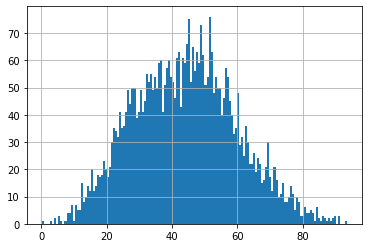

In [5]:
df['%'].hist(bins=150)
print('Среднее по всей выборке: ',df['%'].mean())

In [6]:
some_states_1 = ['AK','OH','WV','ME','CA','MD']
some_states_2 = ['WA','AK','DE']
some_states_3 = ['AZ','RI','MA']



sub_df = df.loc[df['State Postal'].isin(some_states_2)]  # Выборка по нескольким штатам
l,s,r=mean_confidence_interval(sub_df['%'], 0.990)
l,s,r

(42.025084908626724, 46.23478260869564, 50.444480308764554)

In [7]:
df['State Postal'].value_counts()

ME    498
MA    352
TX    255
VT    247
NH    238
VA    135
KY    121
MO    116
KS    106
IL    103
NC    101
IA    100
TN     96
NE     94
IN     93
OH     89
MN     88
MI     84
MS     83
OK     78
AR     75
WI     73
AL     68
PA     68
SD     67
LA     65
NY     63
CA     59
MT     57
WV     56
ND     54
ID     45
RI     40
WA     40
OR     37
NM     34
MD     25
NJ     22
NV     18
AZ     16
HI      5
DE      4
DC      2
AK      2
Name: State Postal, dtype: int64

<p style="align: center;"><img align=center src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQM7ZUiNIwL4fZho5F7zqWpLBw-eL-Ttg0-UA&usqp=CAU"  width=400></p>
 

<div class="alert alert-info">
<b>Другой пример: </b>
    
Расмотрим такой случай. Допустим, вы журналист и оказались в 2016 году в предверии выборов президента в США и хотите по результатам своих исследований достаточно точно определить, кто победит на этих выборах. Сколько вам необходимо опросить людей, чтобы назвать будущего президента с точность в 95%???
</div>

<div class="alert alert-info">
    
Результаты предшествующих исследований свидетельствуют, что стандартное отклонение генеральной совокупности приближенно равно 15. Таким образом, обозначим погрешность: $\Delta$ = 5, Стандартное отклонение: $\sigma$ = 15 и Z = 1,96

</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения


In [8]:
sigma = 15  # Стандартное отклонение
Z = 1.96  #  %   # Квантиль нормального распределения. 
Delta = 5 #%         #Погрешность

In [9]:
N = ((sigma*Z)/Delta)**2
N

34.5744

# Проверим разумность наших расуждений:

Стандартное отклонение:  15.742396788859033
Среднее:  44.07946954813346


<AxesSubplot:>

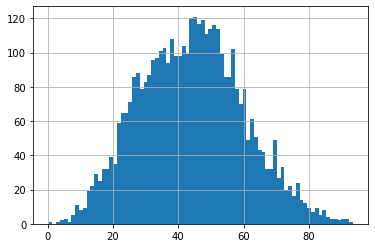

In [10]:
df = df['%']
print('Стандартное отклонение: ', df.std())
print('Среднее: ', df.mean())
df.hist(bins=80)

In [11]:
MEAN = df.sample(n = int(N)).mean()  # Возьмем выборку из случайных n значений
print('Среднее выборки: ', MEAN)
print('Среднее генеральной совокупности: ', df.mean())
print(MEAN-Delta, MEAN+Delta)

Среднее выборки:  44.505882352941164
Среднее генеральной совокупности:  44.07946954813346
39.505882352941164 49.505882352941164


In [12]:
df.boxplot(by='%')

AttributeError: 'Series' object has no attribute 'boxplot'

In [13]:
from scipy.stats import norm
norm.ppf(0.95, loc=0, scale=1)


1.6448536269514722

# Проверка гипотез с помощью Python. 

In [14]:
from scipy import stats  # Импортируем библиотеку
np.random.seed(21)  # Загрепим seed для воспроизводимости результата.

# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное распределение = scale
A = stats.norm.rvs(loc=50, scale=10, size=500)  
B = stats.norm.rvs(loc=49, scale=10, size=1500) 

stats.ttest_ind(A, B)

Ttest_indResult(statistic=3.0258839844589733, pvalue=0.0025107075866209454)

In [15]:
# stats.ttest_ind(A, B, equal_var = False)

Мы получаем хорошее значение p, равное 0,0026, и, таким образом, мы отклоняем нулевую гипотезу и, таким образом,
это доказывает, что средние значения двух распределений различны и различие статистически значимо.

#### И действительно, если посмотреть на сгенерированные выборки. 

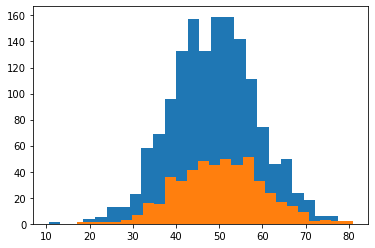

In [16]:
plt.hist(B, bins=25); #Выборка A
plt.hist(A, bins=25);  #Выборка B

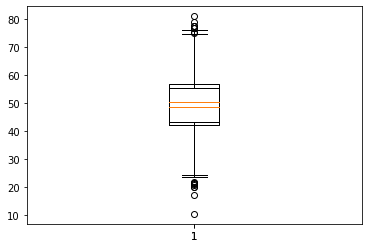

In [17]:
plt.boxplot(A);
plt.boxplot(B);


# Проверка гипотез

### t-Тест Стьюдента

In [18]:
from scipy import stats
np.random.seed(42)  # Загрепим seed для воспроизводимости результата.

## Определим 2 случайных распределения
N = 100  #Размер выборок


b = np.random.randn(N) #Нормальное распределение с mean = 0 and var = 1
a = np.random.randn(N) + 1.5 #Нормальное распределение с mean = 2 and var = 1
 
### мы получаем хорошее значение p, равное 0,0005, и, таким образом, мы отклоняем нулевую гипотезу и, таким образом,
### это доказывает, что средние значения двух распределений различны и различие статистически значимо.
 
t , p  = stats.ttest_ind(a, b)
print("t = " + str(t))
print("p = " + str(p))

# Большое значение t-score говорит нам, что группы отличаются
# Маленькие значения t-score говорят нам, что группы схожи

t = 12.348223942992178
p = 2.395356067387906e-26


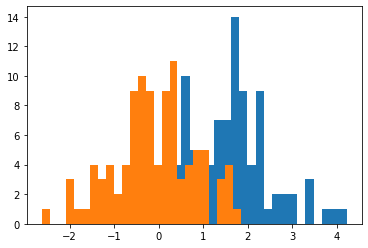

In [19]:
plt.hist(a, bins=25); #Выборка a
plt.hist(b, bins=25);  #Выборка b

# a. Одновыборочный T-test (Выборка + ГС)

<div class="alert alert-info">
<b>Описание: </b>
Давайте попробуем это на одном образце. Тест покажет нам, отличаются ли средние значения выборки и генеральной совокупности (сравниваем с генеральной!). Рассмотрим количество голосующих в Индии и население всего Мира. Отличается ли средний возраст избирателей Индии от возраста населения? Сейчас выясним!
</div>

In [20]:
import scipy.stats as stats
 

population_ages1=stats.norm.rvs(loc=18, scale=45, size=150000)   
population_ages2=stats.norm.rvs(loc=18, scale=10, size=100000)
population_ages=np.concatenate((population_ages1,population_ages2))  # Сгенерировали всю популяцию. 


india_ages1=stats.norm.rvs(loc=18, scale=45, size=9000)  # Индия 1
india_ages2=stats.norm.rvs(loc=18, scale=35, size=9000)
india_ages=np.concatenate((india_ages1,india_ages2)) #Выборка
population_ages.mean()


18.04097903032585

In [21]:
india_ages.mean()

17.912805318044327

In [22]:
stats.ttest_1samp(a=india_ages, popmean=population_ages.mean())

Ttest_1sampResult(statistic=-0.42891365181458957, pvalue=0.6679911980738282)

**Теперь это значение `statistic=0.1197` говорит нам, насколько отклоняется выборочное среднее от нулевой гипотезы.**

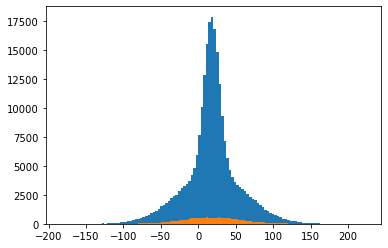

In [23]:
plt.hist(population_ages, bins=120); # Вся популяция.
plt.hist(india_ages, bins=120);  # Выборка

# b. Двух-выборочный T-test (Две выборки)

<div class="alert alert-info">
<b>Описание: </b>
Такой тест показывает, имеют ли две выборки данных разные средние значения (Теперь у нас две разные выборки, а не одна!). Здесь мы принимаем нулевую гипотезу о том, что обе группы имеют равные средние. Для этого нам не нужен известный параметр численности.
</div>

In [24]:
np.random.seed(84)
maharashtra_ages1=stats.norm.rvs(loc=17,scale=5,size=3000)
maharashtra_ages2=stats.norm.rvs(loc=17,scale=15,size=2000)
 

maharashtra_ages=np.concatenate((maharashtra_ages1,maharashtra_ages2))
maharashtra_ages.mean()
 

16.93951973942959

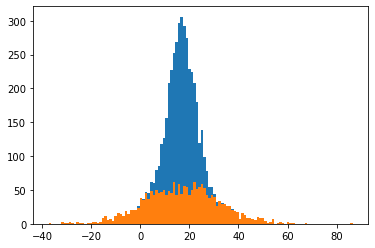

In [25]:
#Расскомментировать, если интересно увидеть отличия визуально
plt.hist(maharashtra_ages, bins=120);
plt.hist(maharashtra_ages2, bins=120);

In [26]:
stats.ttest_ind(a=india_ages, b=maharashtra_ages, equal_var=False)  # Смотри сюда!!! 

Ttest_indResult(statistic=2.929306138816564, pvalue=0.003400545578247028)

**Значение `pvalue= 0.0014` говорит о том, что существует вероятность 0.14%, что данные выборки настолько далеко друг от друга
для двух одинаковых групп. Это меньше, чем уровень достоверности 5%.**

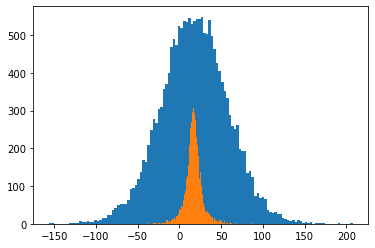

In [27]:
#Расскомментировать, если интересно увидеть отличия визуально
plt.hist(india_ages, bins=120);
plt.hist(maharashtra_ages, bins=120);

# c. Paired T-test (Сравнение зависимых)

<div class="alert alert-info">
<b>Описание: </b>
    
T-критерий парной выборки, иногда называемый `t-критерием` зависимой выборки, представляет собой статистическую процедуру, используемую для определения того, равна ли нулю средняя разница между двумя наборами наблюдений. В парном выборочном `t-тесте` каждый субъект или объект измеряется дважды, в результате чего получаются пары наблюдений. Общие применения парного `t-критерия` выборки включают исследования случай-контроль или планы повторных измерений. 

 Предположим, вас интересует оценка эффективности программы обучения компании. Один из подходов, который вы можете рассмотреть, - это измерение производительности выборки сотрудников до и после завершения программы и анализ различий с использованием парного выборочного `t-критерия`. 
</div>

In [28]:
np.random.seed(12)
before = stats.norm.rvs(scale = 30, loc = 250, size = 100)
after = before + stats.norm.rvs(scale = 5, loc = -.273, size = 100)
weight_df = pd.DataFrame({"weight_before":before,
                         "weight_after":after,
                         "weight_change":after-before})
weight_df.describe()

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,245.670775,244.316557,-1.354218
std,31.536594,31.351874,5.157803
min,155.577504,155.560250,-13.370467
25%,227.831705,224.927586,-5.204568
50%,246.688266,246.142588,-1.629565
75%,265.132293,261.730528,1.989948
max,336.154582,332.751176,14.935431


In [29]:
stats.ttest_rel(a=before,b=after)

Ttest_relResult(statistic=2.625571255881005, pvalue=0.01002290520917281)

**Итак, мы видим, что у нас есть только 1% шансов найти такие огромные различия между образцами.**

# Практическое применение t-Тест Стьюдента

<div class="alert alert-info">
<b>Задание: </b>
    
Представим, что вы следователь какой-то крупной рекламной компаннии. 
Ваша задача иследовать рыннок манго в течение последних нескольких лет.
У вас уже есть предварительные данные. Ваши подчиненные решили схалтурить и принести вам совсем другие отчеты. 

Сможели ли вы их разоблачить с помощью t-Тест Стьюдента?
</div>

<p style="align: center;"><img align=center src="https://www.canadianbusiness.com/wp-content/uploads/2012/02/6ed2b4b84defad6ff7b3b813f634.jpg"  width=400></p>



In [30]:
avocado = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/avocado.csv'
Students = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/StudentsPerformance.csv'

A = pd.read_csv(avocado, sep=',', index_col=0, error_bad_lines=False).AveragePrice[:1000]
B = pd.read_csv(Students, sep=',', index_col=0, error_bad_lines=False)['math score']
t, p = stats.ttest_ind(A, B)
t, p

(-135.56983375430264, 0.0)

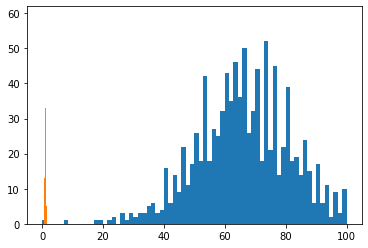

In [31]:
#и действительно выборки пренадлежать разным распределениям

plt.hist(B, bins=70);
plt.hist(A, bins=70);

# $\chi^{2}$ -  Критерий пирсона

In [32]:
import scipy as sps

# Сгенерируем случайную матрицу 2х2
X, y = np.random.randint(2, size=50).reshape(10, 5), np.random.randint(2, size=10) 
contingency_table = sps.sparse.coo_matrix( (np.ones_like(y), (X[:, 0], y)),    
                                         shape=(np.unique(X[:, 0]).shape[0], 
                                                np.unique(y).shape[0])).A

print('Реальная таблица')
print(contingency_table)
chi2, p, do,expected =  sps.stats.chi2_contingency(contingency_table)

print(chi2, p, do)

print('Ожидаемая таблица')
print(expected)

# Возвращает:
# chi2 : Посчитанную статистику теста.
# p :  p-value теста
# dof : Степени свободы
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы.

Реальная таблица
[[6 0]
 [1 3]]
3.353174603174603 0.0670755382739151 1
Ожидаемая таблица
[[4.2 1.8]
 [2.8 1.2]]


**Пример использования Хи-квадрат теста**

In [33]:
from scipy.stats import chi2_contingency

 
table = [[10, 20, 30],[6,  9,  17]]
print(np.array(table))
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно независимы')
else:
    print('Вероятно зависимы')

[[10 20 30]
 [ 6  9 17]]
stat=0.272, p=0.873
Вероятно независимы


In [34]:
subjects = pd.DataFrame(
    [
        [25,46,15],
        [15,44,15],
        [10,10,20]
    ],
    index=['Биология','Химия','Физика'],
    columns=['Math SL AA','Math SL AI','Math HL'])
subjects

,Math SL AA,Math SL AI,Math HL
Биология,25,46,15
Химия,15,44,15
Физика,10,10,20


**Если рассчитанный хи-квадрат больше критического значения, мы отклоняем нулевую гипотезу.**

In [35]:
chi, pval, dof, exp = scipy.stats.chi2_contingency(subjects) #  
print('p-value is: ', pval)
significance = 0.05
p = 1 - significance
critical_value = scipy.stats.chi2.ppf(p, dof)
print('chi=%.6f, критическоре значение=%.6f\n' % (chi, critical_value))



if chi > critical_value:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
        Они не независимы.""" % (significance))
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы. 
        Они независимы.""" % (significance))

p-value is:  0.0004176680832291999
chi=20.392835, критическоре значение=9.487729

На 0.05 уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
        Они не независимы.


**В качестве альтернативы мы можем сравнить p-значение и уровень значимости. Если значение p <уровня значимости, мы отклоняем нулевую гипотезу.**

In [36]:
chi, pval, dof, exp = scipy.stats.chi2_contingency(subjects)
significance = 0.05
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))


if pval < significance:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.""" % (significance))
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы.  
            Они независимы.""" % (significance))

p-value=0.000418, significance=0.05

На 0.05 уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.


# Точный критерий Фишера 

In [37]:
import scipy as sp

x = [[107,93],[74,45]]
print(x)
oddsratio, pvalue = sp.stats.fisher_exact(x)
oddsratio, pvalue

[[107, 93], [74, 45]]


(0.6996512641673932, 0.1607594221528123)

# Проанализируем теперь рынок жилья в New York City

New York City Airbnb Open Data
Airbnb listings and metrics in NYC, NY, USA (2019)

<p style="align: center;"><img align=center src="https://upload.wikimedia.org/wikipedia/commons/5/5a/New_York_City_District_Map.png
"  width=400></p>


<div class="alert alert-info">
<b>Предостирежение: </b>
    
Для построения доверительного интервала с помощью метода, показанного выше, важно, чтобы распределение исследуемой выборки имело нормально распределение
</div>

In [38]:
url  = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/AB_NYC_2019.csv'
df = pd.read_csv(url, error_bad_lines=False)
#df = pd.read_csv('AB_NYC_2019.csv')
df.dropna(how='any',inplace=True)
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<AxesSubplot:>

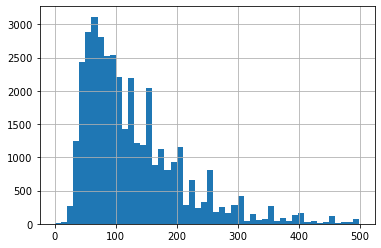

In [39]:
df[df.price<500].price.hist(bins=50)

In [40]:
print('Можно ли использовать тут наш подход?')

Можно ли использовать тут наш подход?


<AxesSubplot:>

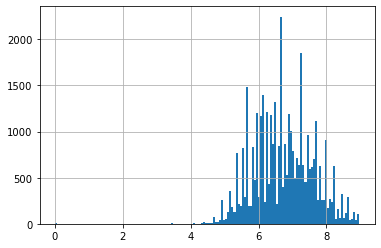

In [41]:
np.log2(abs(df[df.price<500].price)+1).hist(bins=150)

<AxesSubplot:>

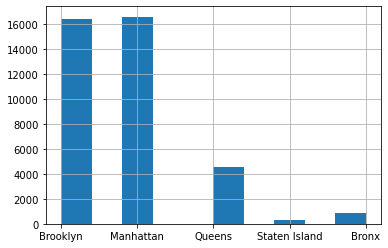

In [42]:
df.neighbourhood_group.hist()

In [43]:
print(df[df.price<400].price.mean())

data = df[(df.neighbourhood_group == 'Brooklyn') | (df.neighbourhood_group=='Staten Island') | (df.neighbourhood_group=='Queens')].price

mean_confidence_interval(data, confidence=0.999) # Возможно вам понадобиться эта функция.

122.56345677697612


(111.68856960410567, 115.49388042203987, 119.29919123997406)

# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [4]:
### Ваш код/вычисления...
Z = 2.241
sigma = 225 ** .5
delta = 3
n = (Z * sigma / delta) ** 2 #Запишите в эту переменную ваш высчитанный ответ!
n = round(n)
n

126

In [5]:
#Не меняйте этот код, он нужен для проверки вашего ответа ответа!
if n%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(n)) == -6483854632660926687: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.95, а не 0.975. Смотри формулу!")
elif hash(str(n)) != 8942973788178395504: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')
#Если у вас долго не получается запустить эту ячейку без ошибок, оставьте свой ответ и идите дальше. 

Нет, Неверно!


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [67]:
### Ваш код/вычисления...
x_mean = 130
n = 25
sigma = 15
Z = 2.576

L = (130 + sigma / 5 * Z)  - (130 - sigma / 5 * Z) #Запишите в эту переменную ваш высчитанный ответ!
L = round(L)
L

15

In [68]:
#Не меняйте этот код, он нужен для проверки ответа!
if L%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(L)) == 8859716730303628099: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.98, а не 0.99. Смотри формулу!")
elif hash(str(L)) != 6091462292841498317: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')
#Если у вас долго не получается запустить эту ячейку без ошибок, но оставьте свой ответ и идите дальше. 

Нет, Неверно!


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьюдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [94]:
import scipy.stats as stats

population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

t , p  = stats.ttest_ind(population_men, population_women)
print(f't-statistic = {t}, p-value = {p}')

t-statistic = 2.807276512472614, p-value = 0.004996242240052946


*Значение p-value не превосходит альфа => нет значимых различий между выборками (нулевая гипотеза не может быть отвергнута).
*Значение t-statistic небольшое, что также свидетельствует о том, что значимых различий между выборками нет.

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-921.37945576, -921.25290045, -921.12634513, ...,  976.69721885,
         976.82377416,  976.95032948]),
 <BarContainer object of 15000 artists>)

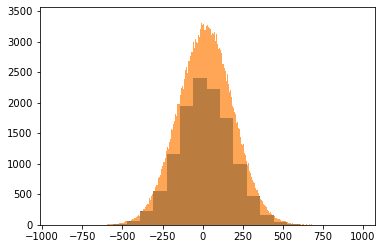

In [113]:
plt.hist(population_women, bins=15)
plt.hist(population_men, bins=15000, alpha=.7)
# Размеры выборок отличаются на три порядка, поэтому такая большая разница между bins и такое большое значение во втором случае.
# Зато теперь наглядно видно, что доверительный интервал выборок примерно одинаков.

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [1]:
sigma = 150
delta = 50
z = 2.241

n = (z * sigma / delta) ** 2
n

45.19872900000001

Размер выборки равен 46 (округляю до целого в большую сторону).

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [7]:
import pandas as pd

observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [8]:
import scipy.stats as stats
# Учтите, что у тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутствие эффекта


oddsratio, pvalue = stats.fisher_exact(observations)#Возможно пригодится эта функция.

print(f'oddsratio = {oddsratio}, pvalue = {pvalue}')

oddsratio = 0.5811965811965812, pvalue = 0.35417955365927367


pvalue не превосходит уровень значимости 5%, следовательно, выборки похожи, следовательно, волшебник умеет предсказывать погоду.

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [16]:
#Вспомогательная функция для подсчета доверительного интервала
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #,h

In [21]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

mean_confidence_interval(data, .9)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [23]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

#Ваш код:
#T-тест Стьюдента:
t, p = scipy.stats.ttest_ind(data_1, data_2)
print(f't-statistic = {t}, p-value = {p}')


t-statistic = 7.35744682757447, p-value = 2.1159475572725764e-11


Тест Стьюдента показал ничтожно малое значение p-value, следовательно, выборки вероятно принадлежат к разным множествам. Это можно видеть и на графике.

(array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., 23.,  0.,  0.,  0.,  0.,  0.,  0., 19.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
         4.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([0.        , 0.13333333, 0.26666667, 0.4       , 0.53333333,
        0.66666667, 0.8       , 0.93333333, 1.06666667, 1.2       ,
        1.33333333, 1.46666667, 1.6       , 1.73333333, 1.86666667,
        2.        , 2.13333333, 2.26666667, 2.4       , 2.53333333,
        2.66666667, 2.8       , 2.93333333, 3.06666667, 3.2       ,
        3.33333333, 3.46666667, 3.6       , 3.73333333, 3.86666667,
        4.        , 4.13333333, 4.26666667, 4.4       , 4.53333333,
        4.66666667, 4.8       , 4.93333333, 5.06666667, 5.2       ,
        5.33333333, 5.46666667, 5.6       , 5.73333333, 5.86666667,
        6.        , 6.13333333, 6.26666667, 6.

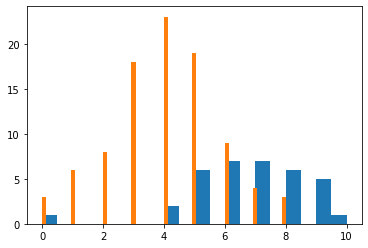

In [29]:
import matplotlib.pyplot as plt

plt.hist(data_1, bins=20)
plt.hist(data_2, bins=60)

In [38]:
#Чтобы провести тест по критерию хи-квадрат, нужно объединить выборки в датафрейм.
# Для этого сначала получу список уникальных значений в обеих выборках.

set(sorted(data_1) + sorted(data_2))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [37]:
# Дальше собираю данные о частоте каждого значения в обеих выборках в общую таблицу.
import pandas as pd

d_test = {'data_1': [data_1.count(x) for x in range(11)],
         'data_2': [data_2.count(x) for x in range(11)]}

for_tests = pd.DataFrame(data=d_test)

for_tests

,data_1,data_2
0,1,3
1,0,6
2,0,8
3,0,18
4,2,23
5,6,19
6,7,9
7,7,4
8,6,3
9,5,0


In [45]:
stat, p, dof, expected = scipy.stats.chi2_contingency(for_tests)
print(f'stat = {stat}, p-value = {p}, dof = {dof}')

stat = 49.311727412372576, p-value = 3.5709468389444977e-07, dof = 10


Тест по критерию хи-квадрат также показал ничтожно маленькое значение p-value. Таким образом, мы можем с полным основанием отвергунть нулевую гипотезу. Выборки принадлежат разным множествам.

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

### Ваши выводы:
Интерпретация результатов зависит от заданного уровня значимости. Если уровень значимости равен или больше 5%, мы можем отвергнуть нулевую гипотезу и считать распределение ненормальным. Если уровень значимости меньше 3%, отвергнуть нулевую гипотезу нельзя.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [48]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-7.5,size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test
t, p = scipy.stats.ttest_ind(A, B)
print(f't-statistic={t}, p-value={p}')

t-statistic=1.8847229265385363, p-value=0.05995194857529052


* p-value не превосходит уровень значимости, следовательно, выборки отличаются незначительно. Нулевую гипотезу нельзя отвергнуть.
* Для того чтобы признать различия значимыми, p-value должен быть не более 0,05.

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,
         1.,  0.,  0.,  1.,  3.,  2.,  1.,  0.,  4.,  1.,  1.,  3.,  4.,
         5.,  3.,  1.,  2.,  3.,  6.,  3.,  2.,  3.,  2.,  2.,  5.,  6.,
         5.,  4.,  6.,  3.,  6.,  6.,  5.,  2.,  6.,  6.,  5., 11.,  5.,
         5.,  7.,  4.,  7.,  8., 10.,  3.,  5.,  7.,  5.,  3.,  3.,  6.,
         6.,  2.,  1.,  4.,  3.,  5.,  2.,  7.,  4.,  1.,  1.,  4.,  3.,
         5.,  3.,  5.,  3.,  6.,  3.,  1.,  3.,  3.,  2.,  0.,  4.,  1.,
         0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.]),
 array([-132.70670939, -130.19882463, -127.69093988, -125.18305513,
        -122.67517038, -120.16728562, -117.65940087, -115.15151612,
        -112.64363137, -110.13574662, -107.62786186, -105.11997711,
        -102.61209236, -100.10420761,  -97.59632285,  -95.0884381 ,
         -92.58055335,  -90.0726686 ,  -87.56478385,  -85.05689909,
         -82.54901434,  -80.04112959,  -77.53324484,  -75.02536008,
         -72.51747533,  -7

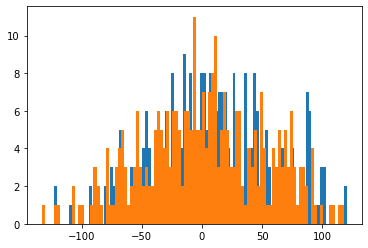

In [47]:
plt.hist(A, bins=100)
plt.hist(B, bins=100)